## 데이터에 대한 이해를 높이기 위하여 통계량을 산출하고 그래프들을 그리고 해석하라.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the display option in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)	
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_info_columns', 1001)

# Loading csv

In [3]:
data = pd.read_csv("./csvfiles/유방암.csv",encoding='cp949')

In [4]:
data.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,0,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,0,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,0,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,0,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


## check target

In [5]:
data['diagnosis'].describe()

count   569.000
mean      0.627
std       0.484
min       0.000
25%       0.000
50%       1.000
75%       1.000
max       1.000
Name: diagnosis, dtype: float64

In [6]:
data['diagnosis'].unique()

array([0, 1])

0,1로 구성된 data확인, 분류 기법으로 예측 필요 확인

# 통계량 산출
* 데이터의 대략적 확인(min, max, mean 등의 기초 통계)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000,0.627,0.484,0.000,0.000,1.000,1.000,1.000
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


# Get numric features column name

In [8]:
object_feat = data.select_dtypes(include=['object']).columns.tolist()
numeric_feat = data.select_dtypes(exclude=['object']).columns.tolist()

In [9]:
print('object_features : ',len(object_feat))
print('numeric features :',len(numeric_feat))

object_features :  0
numeric features : 31


In [10]:
less_unique_feature =[]
for i in numeric_feat:
    if len(data[i].unique()) < 400:
        less_unique_feature.append(i)
print(less_unique_feature)

['diagnosis']


target인 diagnosis를 제외하면 전부 연속형 변수임을 확인

## Check Basic Statistic

In [11]:
data[numeric_feat].describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000,0.627,0.484,0.000,0.000,1.000,1.000,1.000
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


## Correlation with target value

#### 1. 변수들간의 상관관계 확인

In [12]:
corr_df = data.corr()

In [13]:
core = data.corr() # df is the pandas dataframe
c1 = core.abs().unstack()
pair_corr = pd.DataFrame(c1.sort_values(ascending = False),columns=['relation']).reset_index()

In [14]:
pair_corr = pair_corr[pair_corr['relation']!=1]

In [15]:
pair_corr[abs(pair_corr['relation']) >= 0.8]

,level_0,level_1,relation
31,mean perimeter,mean radius,0.998
32,mean radius,mean perimeter,0.998
33,worst perimeter,worst radius,0.994
34,worst radius,worst perimeter,0.994
35,mean radius,mean area,0.987
36,mean area,mean radius,0.987
37,mean perimeter,mean area,0.987
38,mean area,mean perimeter,0.987
39,worst area,worst radius,0.984
40,worst radius,worst area,0.984


### 2. target 변수들과 나머지 상관관계

In [16]:
corr_df['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000
smoothness error           0.067
mean fractal dimension     0.013
texture error              0.008
symmetry error             0.007
fractal dimension error   -0.078
concavity error           -0.254
compactness error         -0.293
worst fractal dimension   -0.324
mean symmetry             -0.330
mean smoothness           -0.359
concave points error      -0.408
mean texture              -0.415
worst symmetry            -0.416
worst smoothness          -0.421
worst texture             -0.457
area error                -0.548
perimeter error           -0.556
radius error              -0.567
worst compactness         -0.591
mean compactness          -0.597
worst concavity           -0.660
mean concavity            -0.696
mean area                 -0.709
mean radius               -0.730
worst area                -0.734
mean perimeter            -0.743
worst radius              -0.776
mean concave points       -0.777
worst perimeter           -0.783
worst conc

In [17]:
temp_df = pd.DataFrame(corr_df['diagnosis'].sort_values(ascending=False)).reset_index()

In [18]:
higt_related_cols = temp_df[abs(temp_df['diagnosis'])>=abs(0.65)]['index'].tolist()

In [19]:
print('상관계수 0.65이상 features :')
for i in higt_related_cols:
    print('\t\t\t ', i)

상관계수 0.65이상 features :
			  diagnosis
			  worst concavity
			  mean concavity
			  mean area
			  mean radius
			  worst area
			  mean perimeter
			  worst radius
			  mean concave points
			  worst perimeter
			  worst concave points


#### 전체 변수들간의 상관계수 보기

Text(0.5, 1.0, 'Variable Correlation')

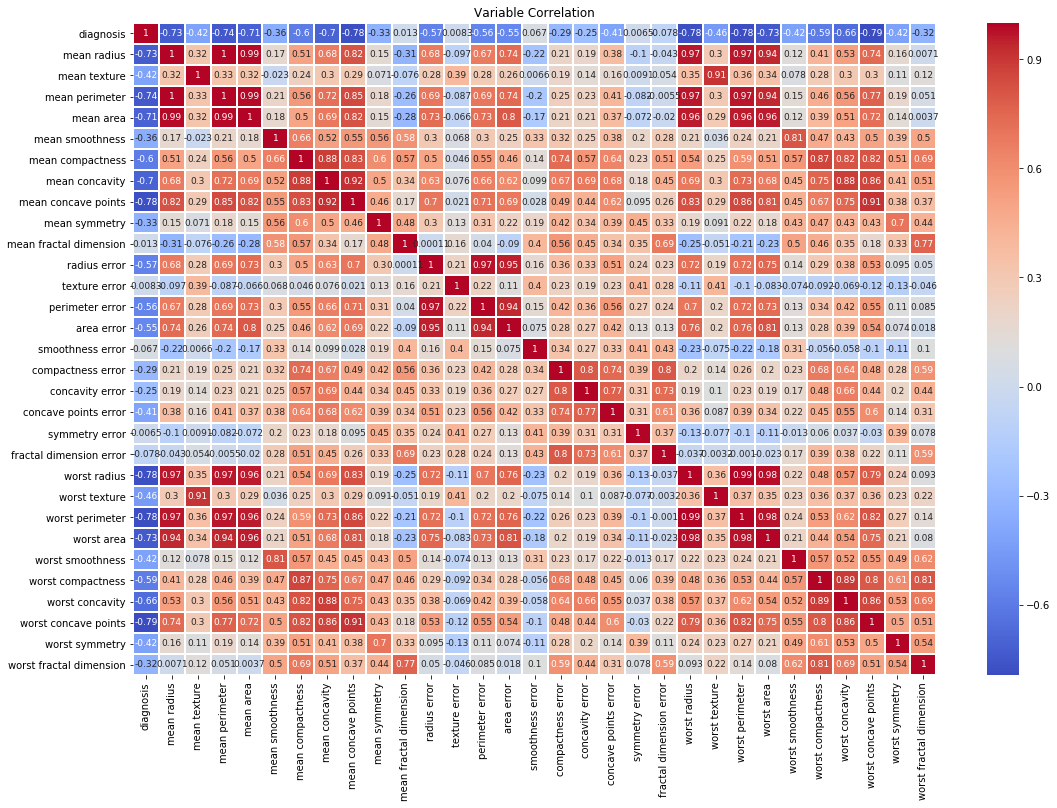

In [20]:
plt.figure(figsize=(18,12))
sns.heatmap(corr_df,cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

## target과 높은 relation의 features boxplot으로 시각화

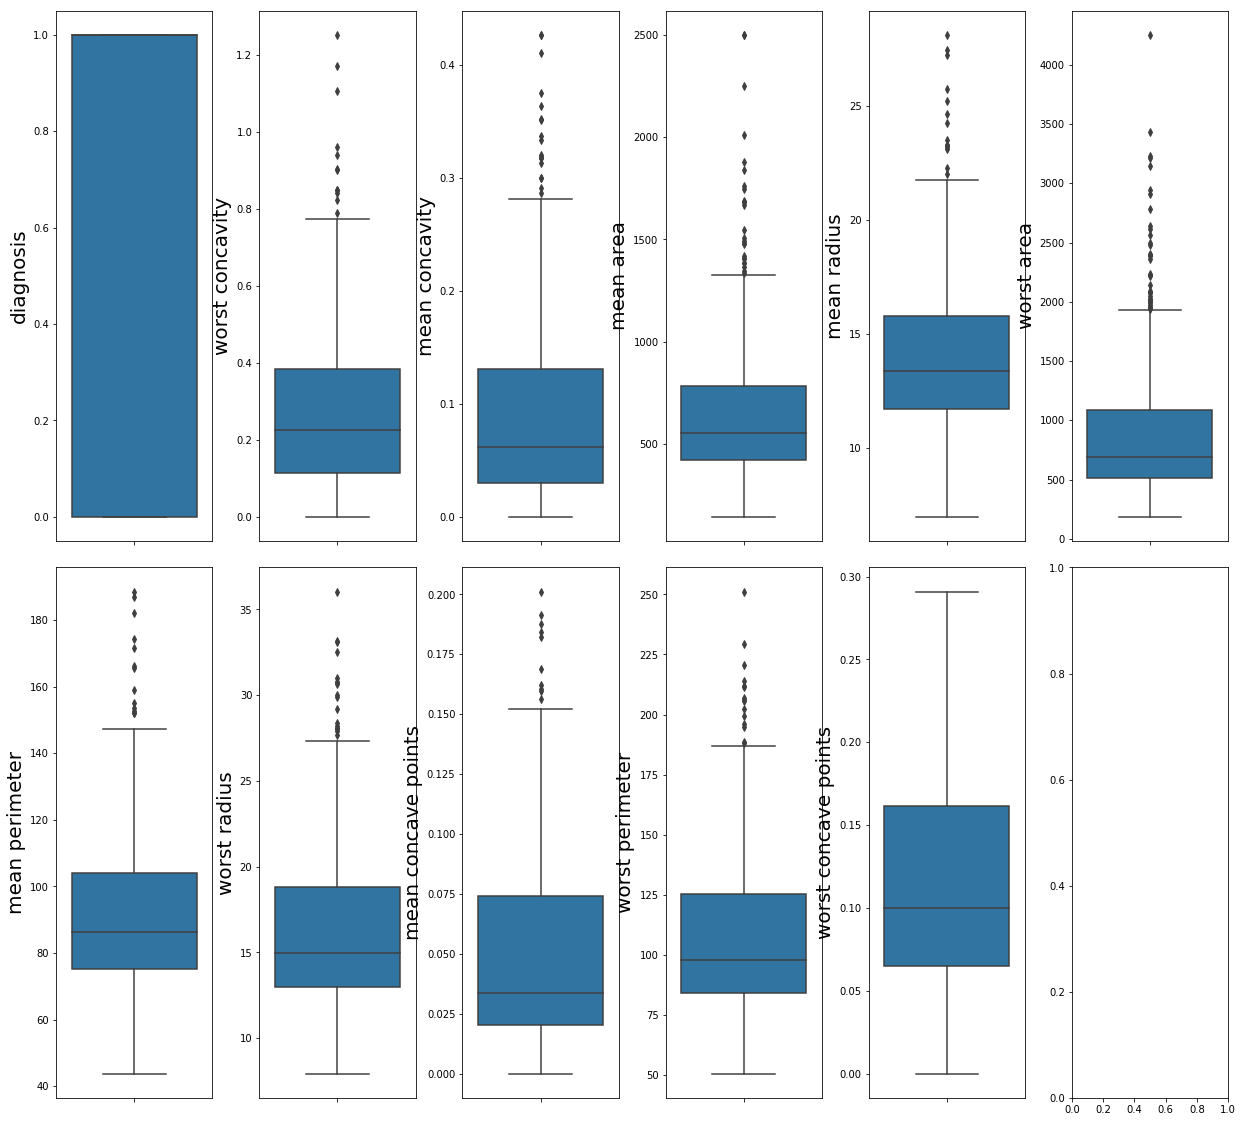

In [21]:
rows = 2
if((((len(higt_related_cols) + 1) // rows) % rows) == 0): 
    cols = (len(higt_related_cols)+1) // rows
else:
    cols = ((len(higt_related_cols)+1) // rows) + ((len(higt_related_cols) // rows) % rows)

fig, axs = plt.subplots(rows, cols, figsize=(21,20))
fig.subplots_adjust(hspace = 0.05, wspace=0.3)
axs = axs.ravel()
for j,k in enumerate(higt_related_cols):
    b = sns.boxplot(y = k, data=data,ax = axs[j],)
    b.set_ylabel(k,fontsize=20)

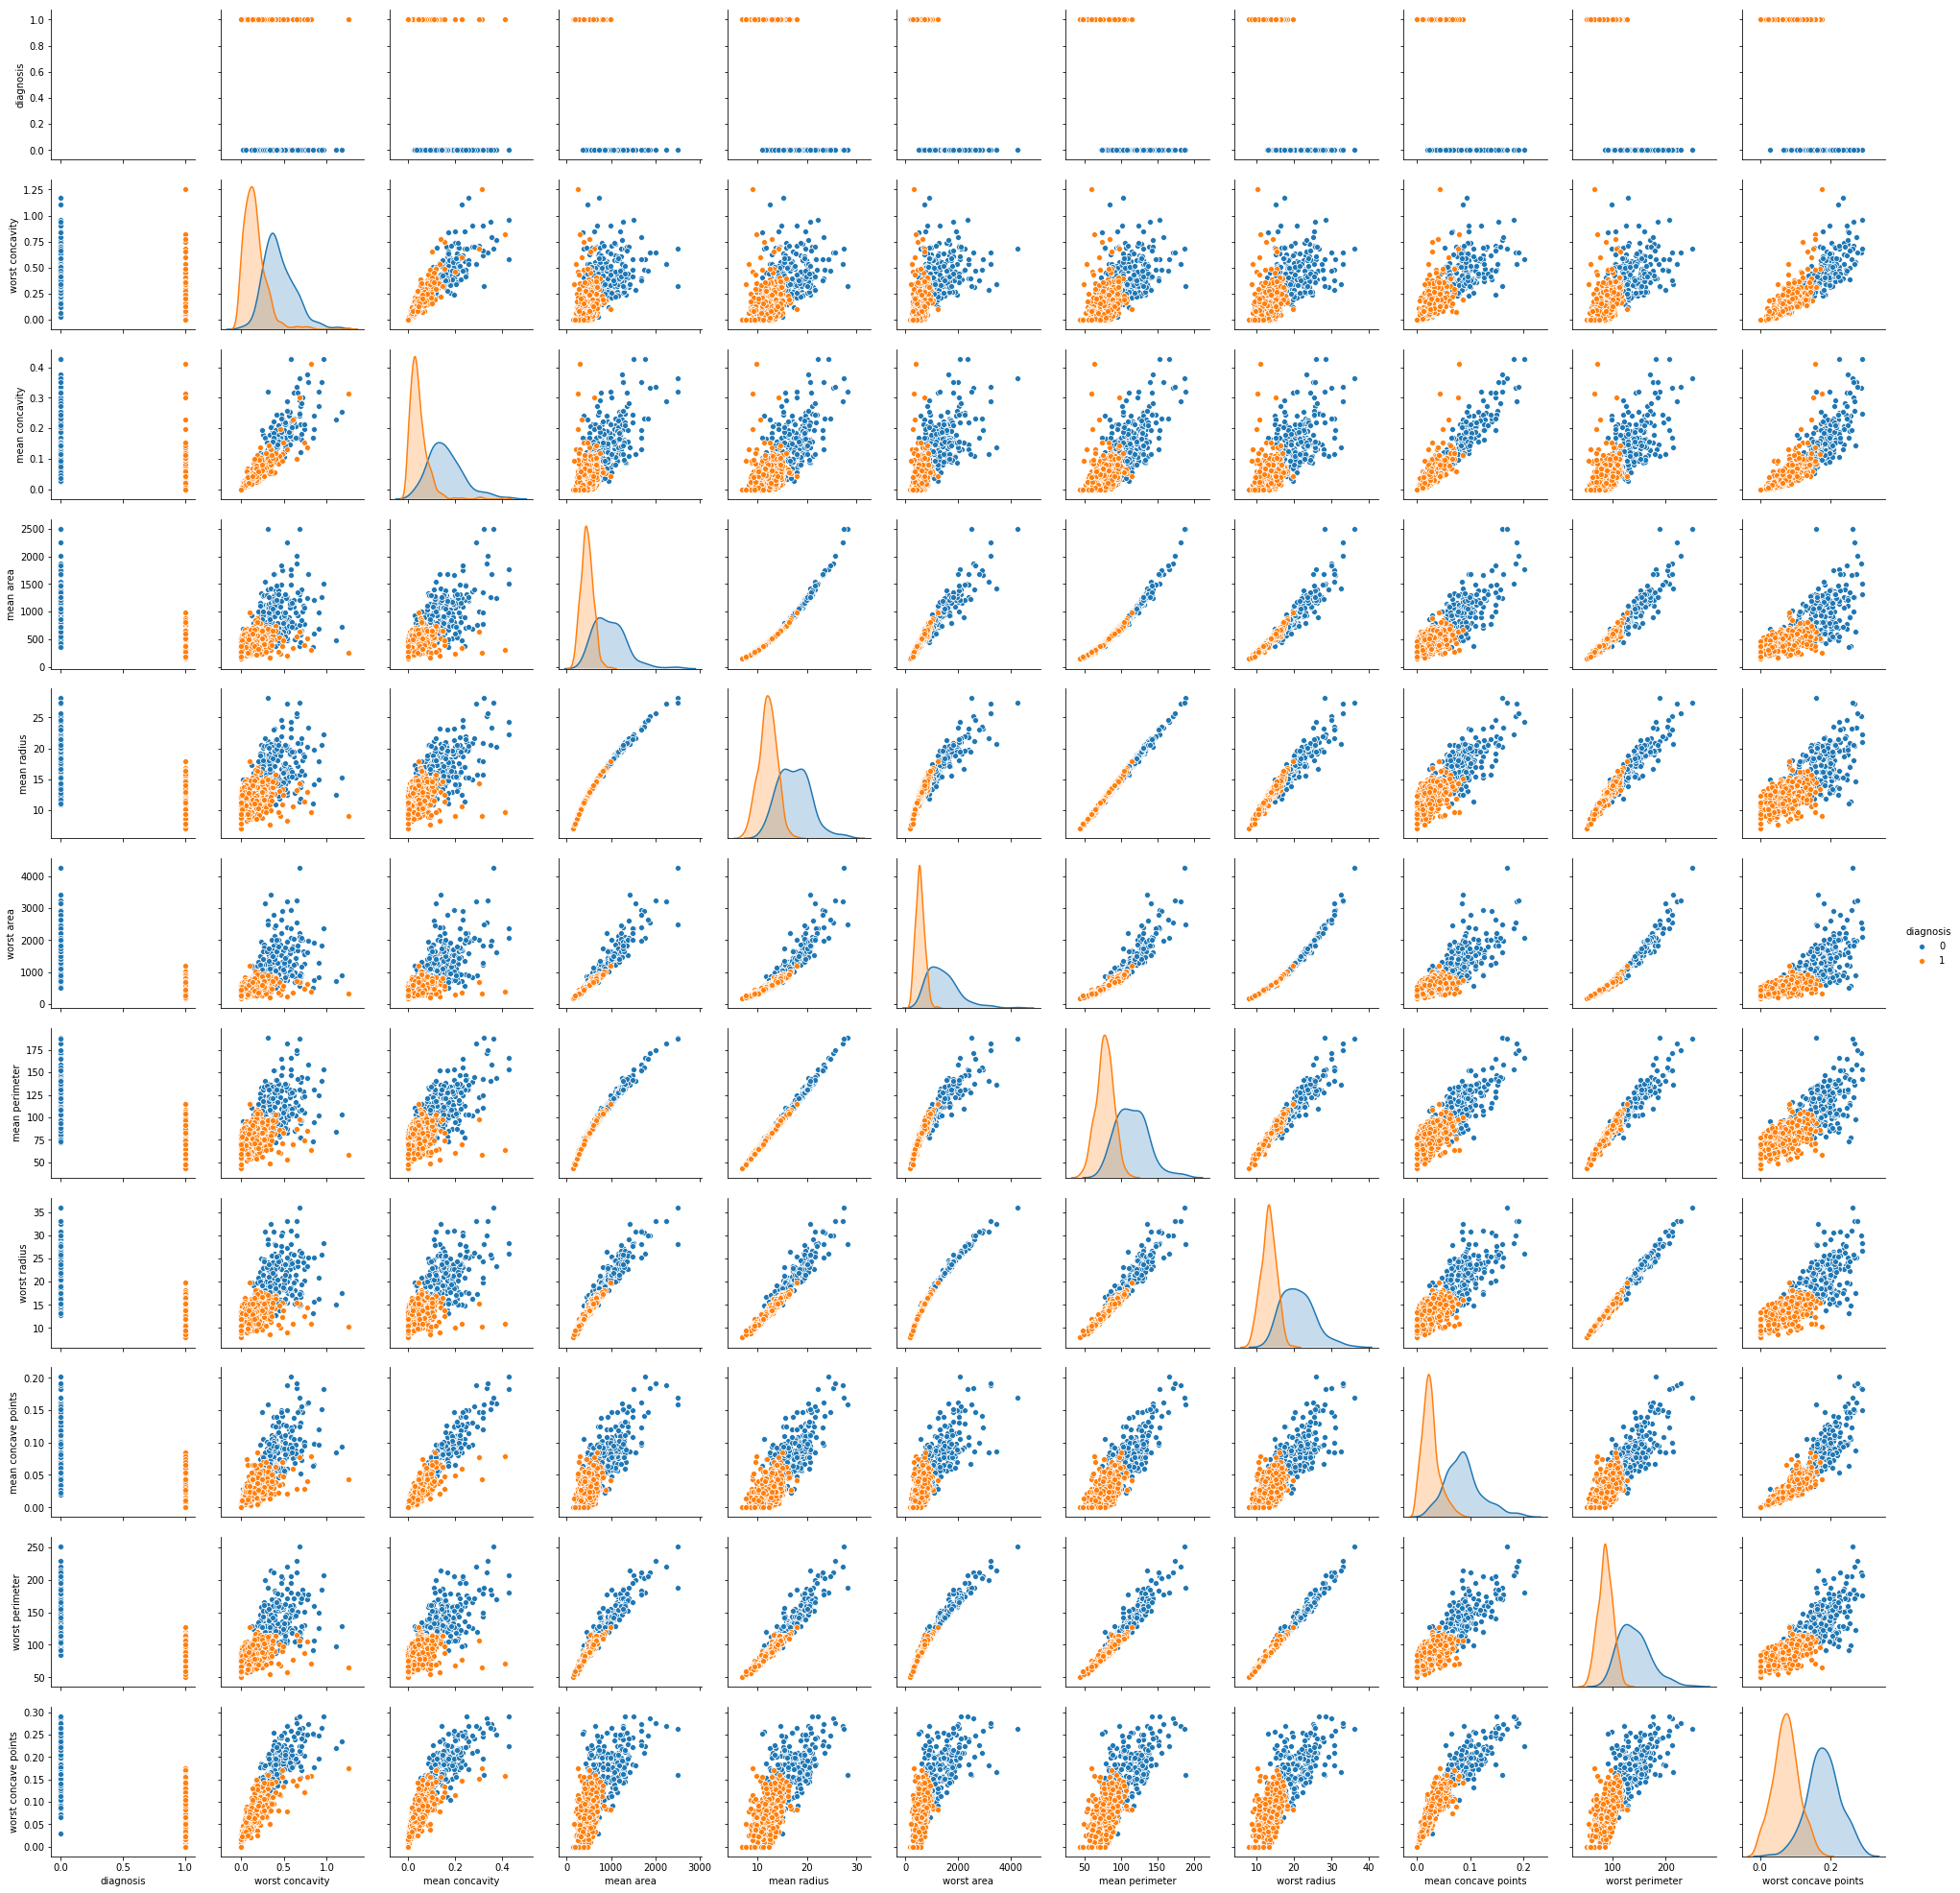

In [22]:
sns.pairplot(data[higt_related_cols],hue = 'diagnosis')

*  위 pairplot으로 대략적으로 보고 유의하다고 생각되는 변수는 다시 그려봄

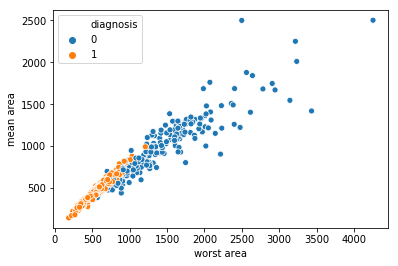

In [23]:
sns.scatterplot(x='worst area', y = 'mean area', data=data, hue='diagnosis')

악성(0)과 양성(1)이 구분되는 변수를 추후 분석에 유의 변수로 지정해야 함.   
-> worst area, mean area